# 🔍 Data Imputation 🔍
The second part of the project focuses on filling in missing values. There are several methods of imputation, including mean, median, or mode imputation, regression imputation, and k-nearest neighbor imputation. These methods are used to fill in missing values when they are missing at random. Python libraries such as Scipy and Numpy are used to implement these methods.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
# pd.set_option('display.max_rows', None)
pd.options.display.max_columns = 150

## User Defined Functions (DEFs) to fill the missing values:

### 1) first_looking(col)

This is a Python User Defined Function (DEF) called ``first_looking`` that takes a column name as input (col). The function is designed to provide an initial analysis of a given column in a Pandas DataFrame (df).

The function first prints the column name, followed by a line of dashes for formatting. It then calculates and prints the percentage of null values in the column (per_of_nulls), the number of null values in the column (num_of_nulls), and the number of unique values in the column (num_of_uniques), each on a separate line.

After printing these summary statistics, the function prints another line of dashes for formatting, followed by a Pandas value_counts() method call that prints the frequency of each unique value in the column, including NaN values (if any). This can help identify common values and outliers in the data, as well as any potential issues, such as missing or incorrect data.

Overall, the first_looking function provides a quick and easy way to get a first look at a given column in a Pandas DataFrame, including basic summary statistics and value frequencies.

In [2]:
# User Defined Function for first-looking to the features/columns

def first_looking(col):
    print("COLUMN NAME    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

### 2) fill_most_freq(df, group_col, col_name)

This is a Python User Defined Function (DEF) called ``fill_most_freq`` that takes three (3) input parameters: a Pandas DataFrame (df), the name of a column to group by (group_col), and the name of a column to fill missing values in (col_name).

The function first defines a docstring that describes its purpose: to fill missing values in the col_name column with the most frequent value (mode) in that column, based on single-stage grouping by the group_col column.

The function then loops over the unique values in the group_col column, and for each value, fills missing values in the col_name column with the mode of that column for the corresponding group. If there is no mode for the group (i.e., the mode list is empty), the function fills missing values in the col_name column with the mode of the entire column.

After filling missing values, the function prints some summary statistics for the col_name column, including the percentage and number of null values, the number of unique values, and the value counts for each unique value in the column, including NaN values (if any). The sort_index method is used to sort the value counts by index (i.e., in ascending order).

Overall, the fill_most_freq function provides a simple and efficient way to fill missing values in a Pandas DataFrame column with the most frequent value based on single-stage grouping by another column.

In [3]:
def fill_most_freq(df, group_col, col_name):
    
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

### 3) fill_mode(df, group_col1, group_col2, col_name)

This is a Python User Defined Function (DEF) called ``fill_mode`` that takes four (4) input parameters: a Pandas DataFrame (df), the name of a column to group by (group_col1), another name of a column to group by (group_col2), and the name of a column to fill missing values in (col_name).

The function first defines a nested loop that iterates over the unique values in both the group_col1 and group_col2 columns. For each combination of unique values, the function fills missing values in the col_name column with the mode of that column for the corresponding group.

The function uses two Boolean conditions (cond1 and cond2) to filter the DataFrame by the current combination of unique values. It then uses the mode() method to calculate the mode of the col_name column for both the cond1 and cond2 subsets of the DataFrame.

The function then fills missing values in the col_name column for the cond2 subset, first checking if there is a mode for the cond2 subset, then checking if there is a mode for the cond1 subset, and finally falling back to the mode of the entire column if there are no modes for either subset.

After filling missing values, the function prints some summary statistics for the col_name column, including the percentage and number of null values, the number of unique values, and the value counts for each unique value in the column, including NaN values (if any).

Overall, the fill_mode function provides a flexible and powerful way to fill missing values in a Pandas DataFrame column based on multiple levels of grouping.

In [4]:
def fill_mode(df, group_col1, group_col2, col_name):
    
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond1 = df[group_col1]==group1
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            mode1 = list(df[cond1][col_name].mode())
            mode2 = list(df[cond2][col_name].mode())
            if mode2 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
            elif mode1 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
            else:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
    
    print("column name    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False))

### 4) fill_prop(df, group_col, col_name)

This is a Python User Defined Function (DEF) called ``fill_prop`` that takes three (3) input parameters: a Pandas DataFrame (df), the name of a column to group by (group_col), and the name of a column to fill missing values in (col_name).

The function first defines a docstring that describes its purpose: to fill missing values in the col_name column using the "forward fill" (ffill) and "backward fill" (bfill) methods, based on single-stage grouping by the group_col column.

The function then loops over the unique values in the group_col column, and for each value, fills missing values in the col_name column for the corresponding group using the ffill and bfill methods to propagate non-null values forward and backward, respectively. This means that if there is a null value in the middle of a group, the value before and after it will be used to fill it.

After filling missing values for each group, the function applies the ffill and bfill methods to the entire column to fill any remaining missing values at the beginning or end of the column.

Finally, the function prints some summary statistics for the col_name column, including the percentage and number of null values, the number of unique values, and the value counts for each unique value in the column, including NaN values (if any). The sort_index method is used to sort the value counts by index (i.e., in ascending order).

Overall, the fill_prop function provides a simple and effective way to fill missing values in a Pandas DataFrame column using the ffill and bfill methods, with the option to group by another column for greater flexibility.

In [5]:
def fill_prop(df, group_col, col_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

### 5) fill(df, group_col1, group_col2, col_name, method)

This is a Python User Defined Function (DEF) called ``fill`` that takes five (5) input parameters: a Pandas DataFrame (df), the name of a first column to group by (group_col1), the name of a second column to group by (group_col2), the name of a column to fill missing values in (col_name), and a method to use for filling missing values (method). The method parameter can take one of four values: "mode", "mean", "median", or "ffill".

The function first defines a docstring that describes its purpose: to fill missing values in the col_name column using one of several methods, based on double-stage grouping by the group_col1 and group_col2 columns.

The function then checks the value of the method parameter and executes the appropriate code block to fill missing values using the specified method.

If method is "mode", the function defines a nested loop that iterates over the unique values in both the group_col1 and group_col2 columns. For each combination of unique values, the function fills missing values in the col_name column with the mode of that column for the corresponding group.

If method is "mean" or "median", the function uses the fillna method to fill missing values in the col_name column based on the mean or median of the column for each combination of unique values in the group_col1 and group_col2 columns, then for each unique value in the group_col1 column, and finally for the entire column.

If method is "ffill", the function defines two nested loops that iterate over the unique values in both the group_col1 and group_col2 columns, and for each combination of unique values, the function fills missing values in the col_name column with the "forward fill" (ffill) and "backward fill" (bfill) methods. The function then applies the same fill methods to fill any remaining missing values at the beginning or end of the column.

After filling missing values using the specified method, the function prints some summary statistics for the col_name column, including the percentage and number of null values, the number of unique values, and the value counts for each unique value in the column, including NaN values (if any). The sort_index method is used to sort the value counts by index (i.e., in ascending order).

Overall, the fill function provides a flexible and powerful way to fill missing values in a Pandas DataFrame column using several different methods, with the option to group by one or two columns for greater flexibility.

In [6]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [154]:
# Fill with median

def fill_median(df, group_col1, group_col2, group_col3, col_name):
    
    df[col_name].fillna(df.groupby([group_col1, group_col2, group_col3])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

    print("column name    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False))

#### Let's get down the biznness

In [7]:
df0 = pd.read_csv('C:/Users/ihsankoo/Desktop/Data Preprocessing/part-1-cleaning-completed.csv') 
df = df0.copy()

In [8]:
df.sample(3).T

,8638,13417,16368
make_model,Peugeot 5008,SEAT Leon,Dacia Logan
make,Peugeot,SEAT,Dacia
model,5008,Leon,Logan
location,Enkel op afspraak / Uniquement sur rendez-vous...,"Krapendorfer Str. 6, 49688 Lastrup OT Schnelt...","Av. Laboral, 10, 28021 MADRID, ES"
price,32950,22880,9790
body_type,Off-Road/Pick-up,Sedan,Sedan
type,Used,Used,Used
doors,5.000,5.000,4.000
country_version,NaN,NaN,Spain
warranty,NaN,NaN,12.000


In [9]:
def show_nulls(data):
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

<Figure size 720x360 with 0 Axes>

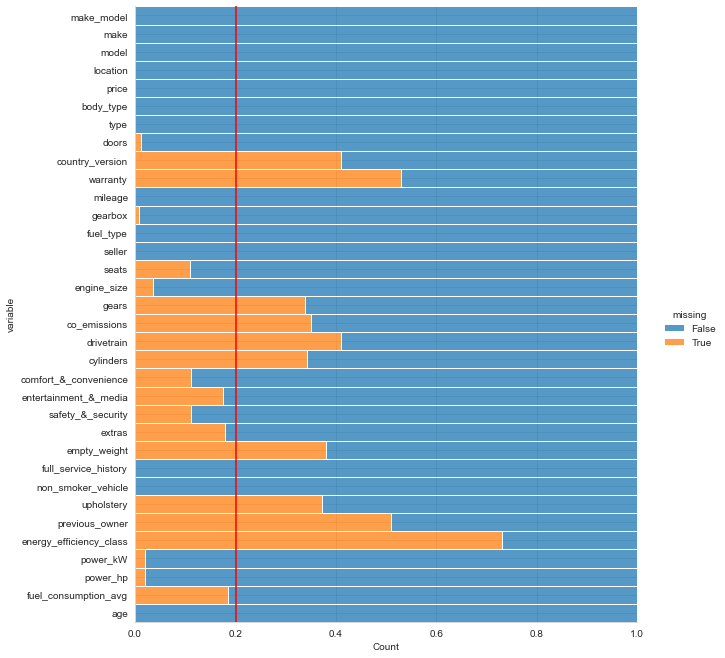

In [10]:
show_nulls(df)

In [11]:
df.shape

(28630, 34)

In [12]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

Column country_version has mixed object types.
Column gearbox has mixed object types.
Column fuel_type has mixed object types.
Column drivetrain has mixed object types.
Column comfort_&_convenience has mixed object types.
Column entertainment_&_media has mixed object types.
Column safety_&_security has mixed object types.
Column extras has mixed object types.
Column upholstery has mixed object types.
Column energy_efficiency_class has mixed object types.


In [13]:
df.duplicated(keep=False).sum()

3896

In [14]:
df[df.duplicated(keep=False)]

,make_model,make,model,location,price,body_type,type,doors,country_version,warranty,mileage,gearbox,fuel_type,seller,seats,engine_size,gears,co_emissions,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age
142,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,"RONDA PONENT 62, 8201 SABADELL, ES",72890,Compact,Used,5.000,Spain,12.000,12900.000,Automatic,Benzine,Dealer,5.000,1991.000,8.000,NaN,4WD,4.000,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,310.000,421.000,8.400,1.000
237,Mercedes-Benz CL,Mercedes-Benz,CL,"--, 77240 Vert St Denis, FR",39990,Compact,Used,5.000,NaN,NaN,8500.000,Automatic,Benzine,Dealer,5.000,1332.000,NaN,NaN,NaN,NaN,"Air conditioning, Armrest, Automatic climate c...","Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...","Alloy wheels, Shift paddles, Sport package, Sp...",NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,0.000
253,Mercedes-Benz CL,Mercedes-Benz,CL,"--, 77240 Vert St Denis, FR",39990,Compact,Used,5.000,NaN,NaN,8500.000,Automatic,Benzine,Dealer,5.000,1332.000,NaN,NaN,NaN,NaN,"Air conditioning, Armrest, Automatic climate c...","Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...","Alloy wheels, Shift paddles, Sport package, Sp...",NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,0.000
263,Mercedes-Benz CL,Mercedes-Benz,CL,"--, 77240 Vert St Denis, FR",39990,Compact,Used,5.000,NaN,NaN,8500.000,Automatic,Benzine,Dealer,5.000,1332.000,NaN,NaN,NaN,NaN,"Air conditioning, Armrest, Automatic climate c...","Digital radio, Hands-free equipment, On-board ...","ABS, Central door lock, Central door lock with...","Alloy wheels, Shift paddles, Sport package, Sp...",NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,0.000
276,Mercedes-Benz A 45 AMG,Mercedes-Benz,A 45 AMG,"RONDA PONENT 62, 8201 SABADELL, ES",72890,Compact,Used,5.000,Spain,12.000,12900.000,Automatic,Benzine,Dealer,5.000,1991.000,8.000,NaN,4WD,4.000,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NaN,310.000,421.000,8.400,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28386,Volvo S90,Volvo,S90,"Donnerwenge 2, 57439 Attendorn, DE",55470,Sedan,Employees car,4.000,NaN,24.000,10000.000,Automatic,Diesel,Dealer,5.000,1969.000,8.000,127.000,4WD,4.000,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, Digital cockpit, Digital radio, Han...","Adaptive Cruise Control, Adaptive headlights, ...","Alloy wheels, Touch screen, Trailer hitch, Voi...",1892.000,Yes,Yes,Part/Full Leather,1.000,efficient,173.000,235.000,4.800,1.000
28556,Volvo S90,Volvo,S90,"Von-Drais-Str. 2, 77855 Achern, DE",31488,Sedan,Used,4.000,NaN,NaN,84000.000,Automatic,Diesel,Dealer,5.000,1969.000,0.000,127.000,4WD,4.000,"Air conditioning, Automatic climate control, A...","On-board computer, Radio, USB","ABS, Adaptive headlights, Central door lock, D...","Alloy wheels, Catalytic Converter, Sport suspe...",1892.000,No,No,Part/Full Leather,NaN,efficient,173.000,235.000,4.800,5.000
28557,Volvo S90,Volvo,S90,"Von-Drais-Str. 2, 77855 Achern, DE",31488,Sedan,Used,4.000,NaN,NaN,84000.000,Automatic,Diesel,Dealer,5.000,1969.000,0.000,127.000,4WD,4.000,"Air conditioning, Automatic climate control, A...","On-board computer, Radio, USB","ABS, Adaptive headlights, Central door lock, D...","Alloy wheels, Catalytic Converter, Sport suspe...",1892.000,No,No,Part/Full Leather,NaN,efficient,173.000,235.000,4.800,5.000
28593,Volvo V40,Volvo,V40,"19 rue des Alliés, 57050 Metz, FR",18999,Sedan,Used,5.000,NaN,12.000,93257.000,Automatic,Diesel,Dealer,5.000,1969.000,NaN,108.000,NaN,NaN,"Armrest, Automatic climate control, 2 zones, A...",NaN,"ABS, Driver-side airbag, Emergency brake assis...",Emergency tyre,NaN,No,No,NaN,NaN,NaN,112.000,152.000,NaN,4.000


In [15]:
df.shape

(28630, 34)

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(26623, 34)

<Figure size 720x360 with 0 Axes>

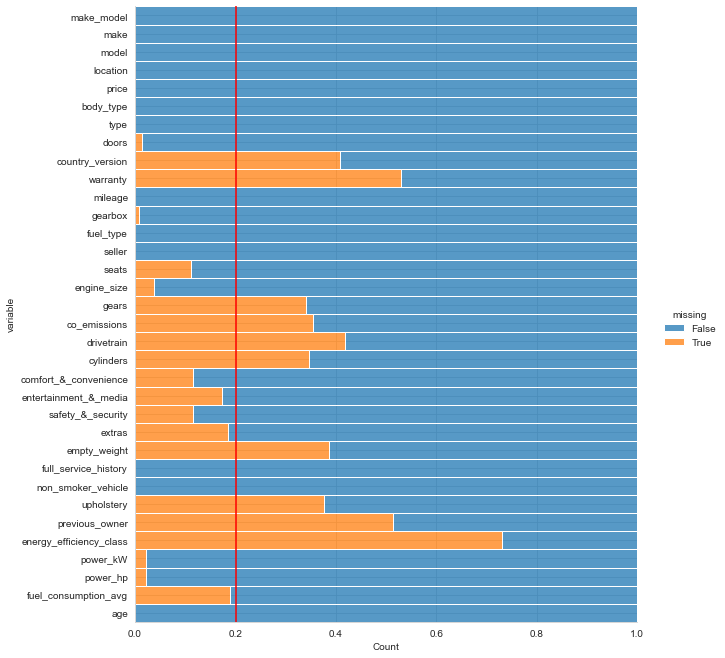

In [18]:
show_nulls(df)

### I'll start data imputation column by column

# FILL doors

In [19]:
first_looking("doors")

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 1.28
num_of_nulls   :  341
num_of_uniques :  6
--------------------------------
5.000    16226
2.000     5060
4.000     2824
3.000     2165
NaN        341
6.000        5
1.000        2
Name: doors, dtype: int64


<mark><b>The number of doors of cars changes by theirs make_models and body_types. So I have decided to fill missing values with mode value of related group.<b><mark>

In [20]:
fill_mode(df, "make_model", "body_type", "doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.000    16372
2.000     5200
4.000     2836
3.000     2208
6.000        5
1.000        2
Name: doors, dtype: int64


# FILL country_version

In [21]:
first_looking("country_version")

COLUMN NAME    :  country_version
--------------------------------
per_of_nulls   :  % 40.73
num_of_nulls   :  10843
num_of_uniques :  25
--------------------------------
NaN                 10843
 Germany             7381
 Spain               5950
 Italy                660
 Belgium              613
 European Union       319
 Netherlands          284
 Austria              261
 France                96
 United States         53
 Czechia               44
 Poland                27
 Hungary               19
 Denmark               18
 Romania               12
 Japan                 12
 Luxembourg             9
 Switzerland            5
 Slovenia               4
 Slovakia               4
 Sweden                 4
 Croatia                1
 Bulgaria               1
 Malta                  1
 Canada                 1
 Mexico                 1
Name: country_version, dtype: int64


Refer to HeatMap notebook to see how I got this final_cleaned_location.csv

In [22]:
location_df = pd.read_csv("C:/Users/ihsankoo/Desktop/Data Preprocessing/final_cleaned_location.csv")

In [23]:
location_df.head(5)

,Unnamed: 0,index,location,address,latitude,longitude,country
0,0,0,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","Calle Forja 6, 11500 El Puerto de Santa María,...",36.619,-6.205,Spain
1,1,1,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","Calle Logroño, 28649 Rozas de Puerto Real, Mad...",40.315,-4.475,Spain
2,2,2,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Muelle de Llevant, 43004 Tarragona, Spain",41.107,1.249,Spain
3,3,3,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES","Calle Provenza, Valle de los Molinos, 45200 Gu...",20.849,-103.429,Mexico
4,4,4,"CARRIL ARAGONES 4, 30007 CASILLAS, ES","Carril de los Aragonés 4, 30007 Murcia, Spain",38.012,-1.089,Spain


In [24]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28630 non-null  int64  
 1   index       28630 non-null  int64  
 2   location    28630 non-null  object 
 3   address     28630 non-null  object 
 4   latitude    28619 non-null  float64
 5   longitude   28619 non-null  float64
 6   country     28530 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ MB


In [25]:
location_df.shape

(28630, 7)

In [26]:
location_df = location_df.drop(columns=["Unnamed: 0", "index"])

In [27]:
location_df.shape

(28630, 5)

In [28]:
location_df.country.isna().sum()

100

In [29]:
# I'll merge these two csv files

df = pd.merge(df, location_df, on='location', how='left')
# df.drop('country',axis=1, inplace=True)

In [30]:
df.sample(3).T

,414769,502515,292441
make_model,Nissan Qashqai,Hyundai Genesis,Skoda Octavia
make,Nissan,Hyundai,Skoda
model,Qashqai,Genesis,Octavia
location,"C. Arroyo Totalán, 36, 29730 Rincón de la Vic...","Av. Laboral, 10, 28021 MADRID, ES","Av. Laboral, 10, 28021 MADRID, ES"
price,18481,20890,14990
body_type,Sedan,Sedan,Sedan
type,Used,Used,Used
doors,5.000,4.000,5.000
country_version,Spain,Spain,Spain
warranty,12.000,12.000,12.000


In [31]:
df.shape

(590987, 38)

In [32]:
df.duplicated().sum()

564040

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(26947, 38)

In [35]:
df.drop("country_version", axis=1, inplace=True)

In [36]:
df.shape

(26947, 37)

In [37]:
df = df.reset_index()

In [38]:
df.country.isna().sum()

92

In [39]:
df[df["country"].isna()][["country", "address", "latitude", "longitude"]]

,country,address,latitude,longitude
3078,NaN,"Trieste, Fr.V.G., Italy",45.654,13.779
3408,NaN,"33082, Fr.V.G., Italy",45.882,12.715
3428,NaN,"Porcia, Fr.V.G., Italy",45.957,12.611
3546,NaN,"42022, Em.Rom., Italy",44.904,10.556
4927,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
5177,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
5317,NaN,"33080, Fr.V.G., Italy",45.925,12.732
5346,NaN,"Enemonzo, Fr.V.G., Italy",46.410,12.877
5375,NaN,"Bologna, Em.Rom., Italy",44.494,11.347
5409,NaN,"42015, Em.Rom., Italy",44.771,10.783


In [40]:
df.country = df.apply(lambda x: 'Italy' if pd.isnull(x.country) and x.address.find('Italy') != -1 else x.country, axis=1)

In [41]:
df[df["country"].isna()][["country", "address", "latitude", "longitude"]]

,country,address,latitude,longitude
4927,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
5177,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
6601,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
9328,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
11909,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
15185,NaN,"P.I. QUEMADAS.PARC 20, 14014 CORDOBA, ES",NaN,NaN
16066,NaN,"P.I. QUEMADAS.PARC 20, 14014 CORDOBA, ES",NaN,NaN
16482,NaN,"CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATAR...",NaN,NaN
16577,NaN,"CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATAR...",NaN,NaN
18163,NaN,"CTRA. DE BARCELONA 88, 08302 MATARÓ LEADSMATAR...",NaN,NaN


In [42]:
df.country = df.apply(lambda x: 'Spain' if pd.isnull(x.country) and x.address.find('BARCELONA') != -1 else x.country, axis=1)

In [43]:
df.country = df.apply(lambda x: 'Belgium' if pd.isnull(x.country) and x.address.find('Belgium') != -1 else x.country, axis=1)

In [44]:
df[df["country"].isna()][["country", "address", "latitude", "longitude"]]

,country,address,latitude,longitude
4927,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
5177,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
6601,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
9328,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
11909,NaN,"AVDA.DELS ARCS,20 POL. IND. AEROPUERTO, 46940...",NaN,NaN
15185,NaN,"P.I. QUEMADAS.PARC 20, 14014 CORDOBA, ES",NaN,NaN
16066,NaN,"P.I. QUEMADAS.PARC 20, 14014 CORDOBA, ES",NaN,NaN


In [45]:
# I googled it they are all in Spain

In [46]:
df.country = df.apply(lambda x: 'Spain' if pd.isnull(x.country) and x.address.find('ES') != -1 else x.country, axis=1)

In [47]:
df[df["country"].isna()][["country", "address", "latitude", "longitude"]]

,country,address,latitude,longitude


In [48]:
df = df.drop(columns=["address", "latitude", "longitude"])

In [49]:
df.country.isna().sum()

0

In [50]:
df.shape

(26947, 35)

In [51]:
df.sample(3).T

,14964,9971,25319
index,294342,190967,527015
make_model,Skoda Scala,Fiat 500C,Volvo C70
make,Skoda,Fiat,Volvo
model,Scala,500C,C70
location,"Assesteenweg 101-103, 1740 Ternat, BE","Rue de Ciney 119, 5580 Rochefort, BE","Het Wendelgoor 3, 7604 PJ ALMELO, NL"
price,20490,18490,25900
body_type,Sedan,Convertible,Convertible
type,Used,Used,Used
doors,5.000,2.000,2.000
warranty,12.000,12.000,NaN


In [52]:
df = df.drop(columns=["index", "location"])

In [53]:
df.shape

(26947, 33)

<Figure size 720x360 with 0 Axes>

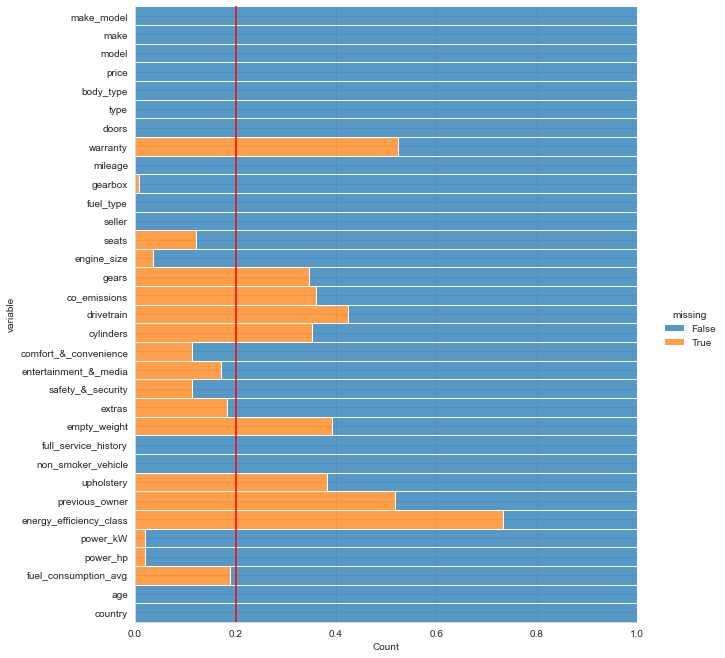

In [54]:
show_nulls(df)

# FILL warranty

In [55]:
first_looking("warranty")

COLUMN NAME    :  warranty
--------------------------------
per_of_nulls   :  % 52.38
num_of_nulls   :  14115
num_of_uniques :  64
--------------------------------
NaN        14115
12.000      9185
24.000      1348
60.000       945
6.000        376
36.000       252
3.000        148
0.000        132
48.000        77
84.000        47
72.000        39
8.000         19
13.000        19
18.000        15
14.000        12
1.000         12
30.000        12
15.000        11
34.000        11
16.000        11
33.000        11
32.000         9
20.000         9
21.000         9
19.000         9
23.000         9
35.000         8
17.000         8
28.000         7
22.000         6
50.000         6
42.000         5
26.000         4
9.000          4
47.000         4
52.000         4
31.000         4
27.000         3
58.000         3
11.000         3
25.000         3
45.000         2
53.000         2
10.000         2
51.000         2
29.000         2
2.000          2
80.000         2
90.000         2
7.0

In [57]:
# I'll assume missing values in warranty column as "No"

In [62]:
df.warranty = df.warranty.astype(str)

In [71]:
df.warranty = df0.warranty.copy()

In [72]:
first_looking('warranty')

COLUMN NAME    :  warranty
--------------------------------
per_of_nulls   :  % 53.57
num_of_nulls   :  14436
num_of_uniques :  63
--------------------------------
NaN        14436
12.000      8991
24.000      1187
60.000       955
6.000        391
36.000       253
3.000        166
0.000        129
48.000        78
84.000        47
72.000        40
8.000         19
13.000        15
1.000         15
18.000        15
30.000        12
14.000        11
34.000        11
33.000        11
15.000        10
16.000         9
32.000         9
20.000         9
23.000         9
19.000         9
17.000         9
35.000         8
21.000         8
50.000         6
22.000         6
42.000         5
28.000         5
26.000         4
52.000         4
9.000          4
47.000         4
58.000         3
31.000         3
25.000         3
11.000         3
27.000         2
53.000         2
45.000         2
2.000          2
57.000         2
80.000         2
7.000          2
51.000         2
90.000         2
29.

In [79]:
def warrantyclassifier(x):
    if pd.api.types.is_numeric_dtype(x) and x == int(x):
        return "Available"
    else:
        return "No Warranty"


In [80]:
df["warranty"] = df["warranty"].apply(warrantyclassifier)

In [81]:
df.warranty.value_counts()

No Warranty    26947
Name: warranty, dtype: int64

In [82]:
df.warranty = df0.warranty.copy()

In [84]:
df.warranty.value_counts(dropna=False)

NaN        14436
12.000      8991
24.000      1187
60.000       955
6.000        391
36.000       253
3.000        166
0.000        129
48.000        78
84.000        47
72.000        40
8.000         19
13.000        15
1.000         15
18.000        15
30.000        12
14.000        11
34.000        11
33.000        11
15.000        10
16.000         9
32.000         9
20.000         9
23.000         9
19.000         9
17.000         9
35.000         8
21.000         8
50.000         6
22.000         6
42.000         5
28.000         5
26.000         4
52.000         4
9.000          4
47.000         4
58.000         3
31.000         3
25.000         3
11.000         3
27.000         2
53.000         2
45.000         2
2.000          2
57.000         2
80.000         2
7.000          2
51.000         2
90.000         2
29.000         2
10.000         2
49.000         1
37.000         1
55.000         1
142.000        1
39.000         1
46.000         1
117.000        1
43.000        

In [85]:
df.warranty.fillna("-", inplace=True)

In [86]:
def warrantyclassifier(x):
    if "-" in x:
        return "No Warranty"
    else:
        return "Available"

df["warranty"] = df["warranty"].astype(str).apply(warrantyclassifier)

In [87]:
df.warranty.value_counts()

No Warranty    14436
Available      12511
Name: warranty, dtype: int64

<Figure size 720x360 with 0 Axes>

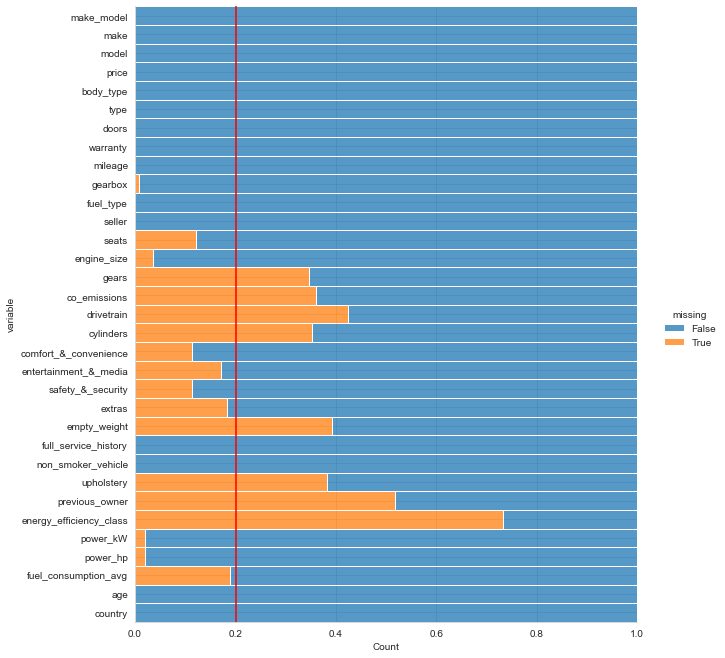

In [89]:
show_nulls(df)

# FILL gearbox

In [90]:
first_looking("gearbox")

COLUMN NAME    :  gearbox
--------------------------------
per_of_nulls   :  % 0.87
num_of_nulls   :  234
num_of_uniques :  3
--------------------------------
Manual            16314
Automatic         10335
NaN                 234
Semi-automatic       64
Name: gearbox, dtype: int64


In [101]:
df[df.fuel_type == "Electric"].gearbox.value_counts(dropna=False)

Automatic         1602
Manual             204
NaN                 11
Semi-automatic       7
Name: gearbox, dtype: int64

In [105]:
df.loc[df['gearbox'].isna() & df['fuel_type'].eq('Electric'), 'gearbox'] = 'Automatic'

In [107]:
df.gearbox.isna().sum()

223

In [111]:
# It'll be best to fill rest with the mode value of the same make_model and body_type

In [112]:
fill(df, "make_model", "body_type", "gearbox", "mode")

COLUMN NAME    :  gearbox
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
--------------------------------
Automatic         10412
Manual            16471
Semi-automatic       64
Name: gearbox, dtype: int64


# FILL gears

In [113]:
for group1 in df["make_model"].unique():
    for group2 in df["body_type"].unique():
        for group3 in df["gearbox"].unique():
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (df["body_type"] == group2) & (df["gearbox"] == group3)
            mode1 = list(df[cond1]["gears"].mode())
            mode2 = list(df[cond2]["gears"].mode())
            mode3 = list(df[cond3]["gears"].mode())
            if mode3 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond3]["gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond2]["gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df[cond1]["gears"].mode()[0])
            else:
                df.loc[cond3, "gears"] = df.loc[cond3, "gears"].fillna(df["gears"].mode()[0])

In [114]:
first_looking("gears")

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
6.000     11663
5.000      7415
7.000      2582
8.000      2152
1.000      1315
9.000      1148
4.000       339
10.000      244
3.000        56
0.000        30
2.000         3
Name: gears, dtype: int64


<Figure size 720x360 with 0 Axes>

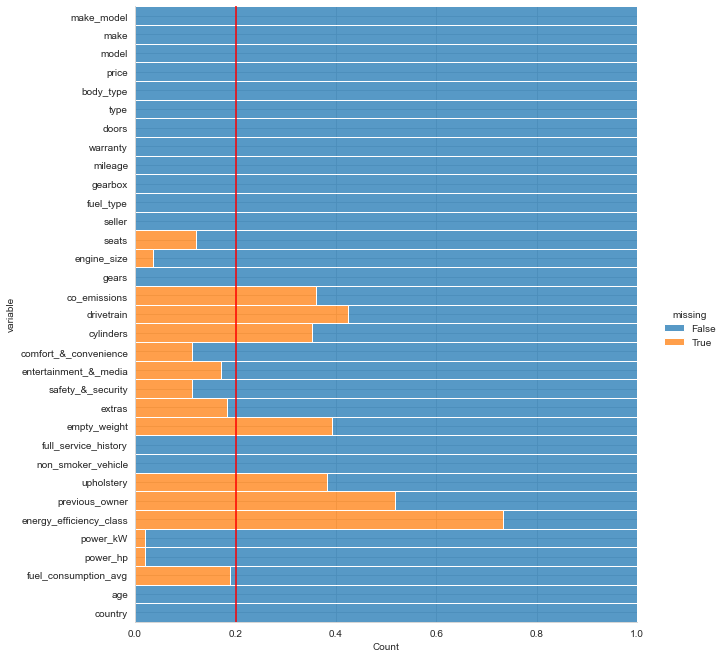

In [116]:
show_nulls(df)

In [121]:
df.isna().sum().T

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        1
gearbox                        0
fuel_type                     10
seller                         0
seats                       3265
engine_size                  983
gears                          0
co_emissions                9698
drivetrain                 11416
cylinders                   9499
comfort_&_convenience       3074
entertainment_&_media       4626
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consu

# FILL mileage

In [122]:
first_looking("mileage")

COLUMN NAME    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  1
num_of_uniques :  14183
--------------------------------
10.000        518
1.000         159
5000.000      118
100.000       111
5.000         105
             ... 
89601.000       1
100111.000      1
11648.000       1
38410.000       1
230047.000      1
Name: mileage, Length: 14184, dtype: int64


In [123]:
df[df.mileage.isna()]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,engine_size,gears,co_emissions,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age,country
10788,Fiat 500X,Fiat,500X,41570,Off-Road/Pick-up,Demonstration,5.000,No Warranty,NaN,Automatic,Electric,Dealer,5.000,1469.000,7.000,NaN,NaN,4.000,"Air conditioning, Armrest, Automatic climate c...","Android Auto, Apple CarPlay, Radio","ABS, Central door lock, Central door lock with...","Alloy wheels, Electronic parking brake, Emerge...",1380.000,No,No,Part/Full Leather,NaN,NaN,96.000,131.000,NaN,0.000,Netherlands


In [127]:
df.mileage.fillna(0, inplace=True)

In [128]:
df.iloc[10788]

make_model                                                         Fiat 500X
make                                                                    Fiat
model                                                                  500X 
price                                                                  41570
body_type                                                  Off-Road/Pick-up 
type                                                          Demonstration 
doors                                                                  5.000
warranty                                                         No Warranty
mileage                                                                0.000
gearbox                                                            Automatic
fuel_type                                                           Electric
seller                                                                Dealer
seats                                                                  5.000

# FILL fuel_type

In [129]:
first_looking("fuel_type")

COLUMN NAME    :  fuel_type
--------------------------------
per_of_nulls   :  % 0.04
num_of_nulls   :  10
num_of_uniques :  5
--------------------------------
Benzine               16751
Diesel                 7984
Electric               1824
Liquid/Natural Gas      368
NaN                      10
Hydrogen                 10
Name: fuel_type, dtype: int64


In [134]:
df[df.fuel_type.isna() == True]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,engine_size,gears,co_emissions,drivetrain,cylinders,comfort_&_convenience,entertainment_&_media,safety_&_security,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age,country
738,Mercedes-Benz 500,Mercedes-Benz,500,45000,Convertible,Used,2.000,No Warranty,69900.000,Automatic,NaN,Dealer,NaN,NaN,4.000,NaN,NaN,NaN,Air conditioning,NaN,NaN,NaN,NaN,No,No,Part/Full Leather,NaN,NaN,NaN,NaN,NaN,39.000,Germany
5664,Renault Arkana,Renault,Arkana,30990,Coupe,Used,5.000,Available,10316.000,Automatic,NaN,Dealer,NaN,NaN,7.000,NaN,NaN,NaN,"Air conditioning, Automatic climate control, C...",NaN,"Blind spot monitor, LED Headlights, Lane depar...",NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1.000,France
5838,Renault Arkana,Renault,Arkana,30990,Coupe,Used,5.000,No Warranty,15000.000,Automatic,NaN,Dealer,NaN,NaN,7.000,NaN,NaN,NaN,NaN,NaN,NaN,Emergency tyre,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,1.000,France
14513,Skoda Octavia,Skoda,Octavia,20950,Station wagon,Used,5.000,No Warranty,10649.000,Automatic,NaN,Dealer,NaN,1498.000,7.000,NaN,Front,NaN,"Armrest, Automatic climate control, 2 zones, C...","Bluetooth, Digital radio, Hands-free equipment...","Central door lock, Daytime running lights, Dri...",Electronic parking brake,NaN,No,Yes,Cloth,1.000,NaN,96.000,131.000,NaN,2.000,Belgium
19483,Nissan Sunny,Nissan,Sunny,999,Coupe,Used,2.000,No Warranty,240000.000,Automatic,NaN,Dealer,4.000,1597.000,5.000,NaN,NaN,NaN,Armrest,NaN,Power steering,"Steel wheels, Summer tyres",NaN,No,No,Cloth,2.000,NaN,66.000,90.000,NaN,32.000,Germany
21225,Ford Mustang,Ford,Mustang,24990,Convertible,Used,2.000,No Warranty,17800.000,Automatic,NaN,Dealer,4.000,4606.000,6.000,NaN,NaN,NaN,"Air conditioning, Armrest, Automatic climate c...","On-board computer, Radio","ABS, Central door lock, Driver-side airbag, El...","Alloy wheels, Summer tyres",NaN,Yes,Yes,Part/Full Leather,2.000,NaN,235.000,320.000,NaN,13.000,Germany
21583,Ford Mustang,Ford,Mustang,21490,Coupe,Used,2.000,No Warranty,105355.000,Automatic,NaN,Dealer,4.000,3720.000,10.000,NaN,NaN,NaN,"Armrest, Cruise control, Electrically adjustab...","On-board computer, Radio, USB","ABS, Alarm system, Central door lock, Driver-s...","Headlight washer system, Summer tyres, Touch s...",NaN,Yes,Yes,Part/Full Leather,NaN,NaN,227.000,309.000,NaN,8.000,Germany
23731,Hyundai TUCSON,Hyundai,TUCSON,19990,Off-Road/Pick-up,Used,5.000,No Warranty,49990.000,Manual,NaN,Dealer,5.000,1591.000,6.000,NaN,Front,4.000,"Air conditioning, Cruise control, Electrical s...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Roof rack",NaN,Yes,No,Cloth,1.000,NaN,97.000,132.000,NaN,2.000,Germany
23749,Hyundai TUCSON,Hyundai,TUCSON,19490,Off-Road/Pick-up,Used,5.000,No Warranty,71950.000,Manual,NaN,Dealer,5.000,1591.000,6.000,NaN,Front,4.000,"Air conditioning, Automatic climate control, 2...","Bluetooth, Hands-free equipment, MP3, On-board...","ABS, Alarm system, Blind spot monitor, Central...","Alloy wheels (17""), Automatically dimming inte...",NaN,No,Yes,Cloth,1.000,NaN,130.000,177.000,NaN,6.000,Germany
24438,Hyundai i30,Hyundai,i30,7999,Station wagon,Used,5.000,Available,67127.000,Manual,NaN,Dealer,5.000,1396.000,6.000,NaN,Front,4.000,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, MP3, On-board computer, ...","ABS, Alarm system, Central door lock, Central ...","Alloy wheels (16""), Spoiler, Trailer hitch",1211.000,Yes,No,Cloth,NaN,NaN,NaN,NaN,NaN,11.000,Netherlands


In [135]:
fill(df, "make_model", "gearbox", "fuel_type", "mode")

COLUMN NAME    :  fuel_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
--------------------------------
Benzine               16760
Diesel                 7985
Electric               1824
Hydrogen                 10
Liquid/Natural Gas      368
Name: fuel_type, dtype: int64


In [137]:
df.fuel_type = df.fuel_type.str.replace("Hydrogen", "Liquid/Natural Gas")

In [138]:
df.fuel_type.value_counts(dropna=False)

Benzine               16760
Diesel                 7985
Electric               1824
Liquid/Natural Gas      378
Name: fuel_type, dtype: int64

In [143]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                       3265
engine_size                  983
gears                          0
co_emissions                9698
drivetrain                 11416
cylinders                   9499
comfort_&_convenience       3074
entertainment_&_media       4626
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consu

# FILL seats

In [144]:
first_looking("seats")

COLUMN NAME    :  seats
--------------------------------
per_of_nulls   :  % 12.12
num_of_nulls   :  3265
num_of_uniques :  11
--------------------------------
5.000     17124
4.000      4885
NaN        3265
2.000      1175
7.000       367
8.000        43
9.000        35
3.000        24
6.000        12
0.000         9
1.000         6
17.000        2
Name: seats, dtype: int64


In [145]:
fill(df, "make_model", "body_type", "seats", "mode")

COLUMN NAME    :  seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
0.000         9
1.000         6
2.000      1250
3.000        25
4.000      5452
5.000     19694
6.000        12
7.000       418
8.000        44
9.000        35
17.000        2
Name: seats, dtype: int64


# FILL co_emissions

In [146]:
first_looking("co_emissions")

COLUMN NAME    :  co_emissions
--------------------------------
per_of_nulls   :  % 35.99
num_of_nulls   :  9698
num_of_uniques :  333
--------------------------------
NaN          9698
0.000        1006
119.000       365
124.000       320
99.000        300
114.000       296
115.000       295
129.000       281
139.000       275
109.000       260
108.000       259
149.000       233
125.000       232
130.000       229
123.000       213
120.000       208
110.000       208
126.000       199
117.000       199
104.000       193
111.000       192
112.000       184
95.000        182
127.000       177
107.000       175
116.000       172
135.000       168
145.000       167
122.000       166
138.000       165
133.000       162
178.000       161
113.000       158
103.000       156
134.000       156
121.000       156
128.000       153
106.000       150
154.000       147
93.000        145
98.000        144
105.000       139
118.000       138
155.000       135
140.000       135
102.000       134
159.

In [150]:
df[df.fuel_type == "Electric"].co_emissions.isna().sum()

823

In [151]:
df.loc[df['co_emissions'].isna() & df['fuel_type'].eq('Electric'), 'co_emissions'] = 0

In [152]:
df.co_emissions.value_counts(dropna=False)

NaN          8875
0.000        1829
119.000       365
124.000       320
99.000        300
114.000       296
115.000       295
129.000       281
139.000       275
109.000       260
108.000       259
149.000       233
125.000       232
130.000       229
123.000       213
120.000       208
110.000       208
126.000       199
117.000       199
104.000       193
111.000       192
112.000       184
95.000        182
127.000       177
107.000       175
116.000       172
135.000       168
145.000       167
122.000       166
138.000       165
133.000       162
178.000       161
113.000       158
103.000       156
134.000       156
121.000       156
128.000       153
106.000       150
154.000       147
93.000        145
98.000        144
105.000       139
118.000       138
155.000       135
140.000       135
102.000       134
159.000       131
148.000       130
88.000        130
136.000       129
156.000       128
96.000        126
131.000       126
144.000       120
92.000        115
147.000   

In [153]:
# I filled the electric vehicles with 0 carbon-dioxide emission, and I will fill the rest with the median value of their make_model and body_type

In [155]:
fill_median(df, "make_model", "body_type", "fuel_type", "co_emissions")

column name    :  co_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  398
--------------------------------
0.000        1948
124.000       921
115.000       565
108.000       555
109.000       549
139.000       536
117.000       522
119.000       483
129.000       473
110.000       444
120.000       424
114.000       412
99.000        386
104.000       356
105.000       355
112.000       341
89.000        314
130.000       309
116.000       307
123.000       303
125.000       295
113.000       287
107.000       282
138.000       260
95.000        256
122.000       256
149.000       251
128.000       242
178.000       237
111.000       236
98.000        236
273.000       235
126.000       223
127.000       214
135.000       213
145.000       213
276.000       211
96.000        209
121.000       202
118.000       202
155.000       191
134.000       187
143.000       187
148.000       184
106.000       184
132.000       177
102.000  

In [156]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                  983
gears                          0
co_emissions                   0
drivetrain                 11416
cylinders                   9499
comfort_&_convenience       3074
entertainment_&_media       4626
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consu

# FILL engine_size

In [158]:
first_looking("engine_size")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 3.65
num_of_nulls   :  983
num_of_uniques :  477
--------------------------------
1598.000     2130
999.000      1962
1969.000     1126
1461.000     1115
NaN           983
1998.000      979
998.000       922
1199.000      877
1498.000      723
1997.000      635
1968.000      617
1332.000      504
1798.000      472
1984.000      453
1499.000      418
898.000       409
1560.000      383
1197.000      381
1242.000      373
1995.000      359
1991.000      352
1368.000      348
1248.000      326
1600.000      301
2143.000      251
1500.000      237
1364.000      227
2000.000      219
1950.000      205
5038.000      203
1591.000      203
3982.000      201
1956.000      195
1395.000      178
3498.000      173
1200.000      171
1796.000      158
2435.000      158
1149.000      157
3696.000      154
1987.000      154
1198.000      152
1497.000      150
1000.000      146
1398.000      145
2996.000      143
1490.00

In [160]:
fill(df, "make_model", "body_type", "engine_size", "mode")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  477
--------------------------------
0.000         312
1.000         109
2.000           9
4.000           2
5.000           3
20.000          1
200.000         1
289.000         1
300.000         1
332.000         1
498.000         1
499.000         5
500.000         2
549.000         1
600.000         1
650.000         2
652.000         2
698.000         1
750.000         2
767.000         6
839.000         2
843.000        10
847.000         1
850.000         5
875.000       112
898.000       416
899.000        20
900.000        75
903.000         4
964.000         3
973.000         2
982.000         1
987.000         3
988.000         1
996.000         2
997.000         1
998.000       942
999.000      1989
1000.000      147
1084.000       38
1086.000       14
1089.000        1
1100.000        9
1108.000       10
1116.000        2
1119.000        1
1120.000  

In [161]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                 11416
cylinders                   9499
comfort_&_convenience       3074
entertainment_&_media       4626
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consu

# FILL drivetrain

In [162]:
first_looking("drivetrain")

COLUMN NAME    :  drivetrain
--------------------------------
per_of_nulls   :  % 42.36
num_of_nulls   :  11416
num_of_uniques :  3
--------------------------------
NaN      11416
Front    11186
4WD       2803
Rear      1542
Name: drivetrain, dtype: int64


In [163]:
fill(df, "make_model", "body_type", "drivetrain", "mode")

COLUMN NAME    :  drivetrain
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
--------------------------------
4WD       3811
Front    20358
Rear      2778
Name: drivetrain, dtype: int64


In [164]:
df.shape

(26947, 33)

In [165]:
pd.set_option("display.max_columns", 33)

In [168]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                     0
cylinders                   9499
comfort_&_convenience       3074
entertainment_&_media       4626
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consu

# FILL cylinders

In [169]:
first_looking("cylinders")

COLUMN NAME    :  cylinders
--------------------------------
per_of_nulls   :  % 35.25
num_of_nulls   :  9499
num_of_uniques :  12
--------------------------------
4.000     12111
NaN        9499
3.000      3166
6.000      1000
8.000       538
5.000       461
2.000       102
0.000        33
1.000        21
12.000        8
7.000         6
26.000        1
16.000        1
Name: cylinders, dtype: int64


In [170]:
fill_mode(df, "make_model", "body_type", "cylinders")

column name    :  cylinders
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  12
--------------------------------
4.000     18682
3.000      5015
6.000      1311
8.000       943
5.000       551
0.000       186
1.000       134
2.000       106
12.000       11
7.000         6
26.000        1
16.000        1
Name: cylinders, dtype: int64


In [171]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                     0
cylinders                      0
comfort_&_convenience       3074
entertainment_&_media       4626
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consu

# FILL comfort_&_convenience

In [172]:
first_looking("comfort_&_convenience")

COLUMN NAME    :  comfort_&_convenience
--------------------------------
per_of_nulls   :  % 11.41
num_of_nulls   :  3074
num_of_uniques :  14438
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    3074
Air conditioning, Automatic climate control, Cruise control                                                                                                                                                                                                                                                              

In [173]:
fill_mode(df, "make_model", "body_type", "comfort_&_convenience")

column name    :  comfort_&_convenience
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  14438
--------------------------------
Air conditioning, Automatic climate control, Cruise control                                                                                                                                                                                                                                                                                                                                      614
Cruise control                                                                                                                                                                                                                                                                                                                                                                                   330
Air conditioning, Electrical side mirrors, Power

In [200]:
df["comfort_&_convenience"] = df["comfort_&_convenience"].apply(lambda x: x.count(",") + 1)

In [204]:
df["comfort_&_convenience"].sample(10)

17712     2
23948    26
19662    14
9895     11
26386    26
19743    22
8483      3
16977    10
14881    15
7349      7
Name: comfort_&_convenience, dtype: int64

In [207]:
df = df.rename(columns = {"comfort_&_convenience" : "num_comfort_convenience"})

In [245]:
df["num_comfort_convenience"] = df["num_comfort_convenience"].astype(float)

In [208]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                     0
cylinders                      0
num_comfort_convenience        0
entertainment_&_media       4626
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consu

# FILL entertainment_&_media

In [209]:
first_looking("entertainment_&_media")

COLUMN NAME    :  entertainment_&_media
--------------------------------
per_of_nulls   :  % 17.17
num_of_nulls   :  4626
num_of_uniques :  1944
--------------------------------
NaN                                                                                                                                                              4626
Bluetooth, USB                                                                                                                                                    984
On-board computer                                                                                                                                                 605
Bluetooth                                                                                                                                                         562
CD player, On-board computer, Radio                                                                                                                           

In [211]:
fill(df, "make_model", "body_type", "entertainment_&_media", "mode")

COLUMN NAME    :  entertainment_&_media
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1944
--------------------------------
Android Auto                                                                                                                                                                                                                                                    3
Android Auto, Apple CarPlay                                                                                                                                                                                                                                     8
Android Auto, Apple CarPlay, Bluetooth                                                                                                                                                                                                                          1
Android Auto, Apple CarPlay, Bluetooth, CD player, Di

In [213]:
multimedia = ["Television", "Android Auto", "Apple CarPlay", "Digital"]

In [214]:
df["multimedia"] = df['entertainment_&_media'].apply(lambda x: "Yes" if any(word in x for word in multimedia) else "No")

In [220]:
df[["entertainment_&_media", "multimedia"]].sample(20)

,entertainment_&_media,multimedia
1097,"Android Auto, Apple CarPlay, Bluetooth, Digita...",Yes
12132,"Bluetooth, Digital radio, Hands-free equipment...",Yes
9763,"Bluetooth, USB",No
17548,"Android Auto, Apple CarPlay, Bluetooth, Digita...",Yes
8382,"Bluetooth, CD player, Digital cockpit, Hands-f...",Yes
13250,"Bluetooth, CD player, Digital cockpit, Digital...",Yes
9820,"CD player, Radio",No
19997,"Bluetooth, USB",No
14485,"Android Auto, Apple CarPlay, Bluetooth, Hands-...",Yes
16066,"Bluetooth, MP3, On-board computer",No


In [221]:
df.shape

(26947, 34)

In [223]:
df.drop(columns = "entertainment_&_media", inplace=True)

In [224]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                     0
cylinders                      0
num_comfort_convenience        0
safety_&_security           3069
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consumption_avg        5078
age       

# FILL safety_&_security

In [225]:
first_looking("safety_&_security")

COLUMN NAME    :  safety_&_security
--------------------------------
per_of_nulls   :  % 11.39
num_of_nulls   :  3069
num_of_uniques :  12549
--------------------------------
NaN                                                                                                                                                                                                                                                                      3069
Isofix                                                                                                                                                                                                                                                                    626
ABS, Central door lock, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag                                                                                                                         167
ABS, Central do

In [226]:
fill_mode(df, "make_model", "body_type", "safety_&_security")

column name    :  safety_&_security
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  12549
--------------------------------
Isofix                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1052
ABS, Fog lights, Side airbag                                                                                                                                                                                                                                                                                                        

In [227]:
df["safety_&_security"].apply(lambda x: x.count(",") + 1)

0        18
1        24
2         6
3         5
4         6
         ..
26942     8
26943    10
26944    15
26945     9
26946    12
Name: safety_&_security, Length: 26947, dtype: int64

In [228]:
df["safety_&_security"] = df["safety_&_security"].apply(lambda x: x.count(",") + 1)

In [230]:
df = df.rename(columns = {"safety_&_security":"num_safety_security"})

In [244]:
df["num_safety_security"] = df["num_safety_security"].astype(float)

In [231]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                     0
cylinders                      0
num_comfort_convenience        0
num_safety_security            0
extras                      4954
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consumption_avg        5078
age       

# FILL extras

In [232]:
first_looking("extras")

COLUMN NAME    :  extras
--------------------------------
per_of_nulls   :  % 18.38
num_of_nulls   :  4954
num_of_uniques :  9360
--------------------------------
NaN                                                                                                                                                                                                                                                                 4954
Alloy wheels                                                                                                                                                                                                                                                        3255
Alloy wheels, Sport seats                                                                                                                                                                                                                                            369
Alloy wheels, Roof rack                   

In [233]:
fill_mode(df, "make_model", "body_type", "extras")

column name    :  extras
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9360
--------------------------------
Alloy wheels                                                                                 6129
Alloy wheels, Sport seats                                                                     486
Roof rack                                                                                     476
Alloy wheels, Roof rack                                                                       290
Alloy wheels, Touch screen                                                                    272
                                                                                             ... 
Alloy wheels (19"), Headlight washer system, Sport package, Sport seats, Sport suspension       1
Alloy wheels (15"), Sport package, Sport seats, Sport suspension                                1
Alloy wheels, E10-enabled, Spoiler                        

In [234]:
df["extras"].apply(lambda x: x.count(",") + 1)

0        1
1        6
2        1
3        1
4        1
        ..
26942    1
26943    2
26944    3
26945    2
26946    4
Name: extras, Length: 26947, dtype: int64

In [235]:
df.extras = df.extras.apply(lambda x: x.count(",") + 1)

In [236]:
df.extras.value_counts()

1     8145
2     3507
3     2891
4     2269
5     1969
6     1596
7     1530
8     1097
9      968
10     846
11     632
12     513
13     358
14     252
15     192
16      96
17      50
18      23
19      10
20       2
26       1
Name: extras, dtype: int64

In [238]:
df.rename(columns = {"extras":"num_extras"}, inplace=True)

In [242]:
df["num_extras"] = df["num_extras"].astype(float)

In [243]:
df["num_extras"].value_counts()

1.000     8145
2.000     3507
3.000     2891
4.000     2269
5.000     1969
6.000     1596
7.000     1530
8.000     1097
9.000      968
10.000     846
11.000     632
12.000     513
13.000     358
14.000     252
15.000     192
16.000      96
17.000      50
18.000      23
19.000      10
20.000       2
26.000       1
Name: num_extras, dtype: int64

In [239]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                     0
cylinders                      0
num_comfort_convenience        0
num_safety_security            0
num_extras                     0
empty_weight               10551
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consumption_avg        5078
age       

# FILL empty_weight

In [240]:
first_looking("empty_weight")

COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 39.15
num_of_nulls   :  10551
num_of_uniques :  1218
--------------------------------
NaN         10551
1395.000      235
1055.000      217
1165.000      195
1320.000      191
            ...  
2335.000        1
2232.000        1
1652.000        1
1891.000        1
1391.000        1
Name: empty_weight, Length: 1219, dtype: int64


In [241]:
fill_mode(df, "make_model", "body_type", "empty_weight")

column name    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1218
--------------------------------
1320.000    715
1280.000    524
1395.000    471
1055.000    453
1165.000    400
           ... 
946.000       1
1631.000      1
2489.000      1
2133.000      1
1391.000      1
Name: empty_weight, Length: 1218, dtype: int64


In [246]:
df.isna().sum()

make_model                     0
make                           0
model                          0
price                          0
body_type                      0
type                           0
doors                          0
warranty                       0
mileage                        0
gearbox                        0
fuel_type                      0
seller                         0
seats                          0
engine_size                    0
gears                          0
co_emissions                   0
drivetrain                     0
cylinders                      0
num_comfort_convenience        0
num_safety_security            0
num_extras                     0
empty_weight                   0
full_service_history           0
non_smoker_vehicle             0
upholstery                 10323
previous_owner             13944
energy_efficiency_class    19765
power_kW                     558
power_hp                     558
fuel_consumption_avg        5078
age       

# FILL upholstery

In [247]:
first_looking("upholstery")

COLUMN NAME    :  upholstery
--------------------------------
per_of_nulls   :  % 38.31
num_of_nulls   :  10323
num_of_uniques :  2
--------------------------------
NaN                  10323
Cloth                 8574
Part/Full Leather     8050
Name: upholstery, dtype: int64


In [248]:
df.upholstery.fillna("-", inplace=True)

In [249]:
df.groupby(["make_model", "body_type", "age", "upholstery"]).price.describe()

count      mean  \
make_model  body_type          age    upholstery                           
Dacia        Compact           0.000  Cloth              2.000 22389.000   
                               1.000  Part/Full Leather  1.000 19515.000   
             Sedan             47.000 Cloth              1.000  9999.000   
             Station wagon     0.000  Cloth              1.000 21799.000   
Dacia Break  Station wagon     0.000  -                  1.000 20500.000   
...                                                        ...       ...   
Volvo XC90   Off-Road/Pick-up  18.000 -                  1.000  6799.000   
             Sedan             1.000  Part/Full Leather  1.000 84900.000   
                               3.000  -                  1.000 48500.000   
                               4.000  -                  1.000 47700.000   
             Station wagon     6.000  Part/Full Leather  2.000 32750.000   

                                                             std       min  \
make_model  body_type          age    upholstery                             
Dacia        Compact           0.000  Cloth              127.279 22299.000   
                               1.000  Part/Full Leather      NaN 19515.000   
             Sedan             47.000 Cloth                  NaN  9999.000   
             Station wagon     0.000  Cloth                  NaN 21799.000   
Dacia Break  Station wagon     0.000  -                      NaN 20500.000   
...                                                          ...       ...   
Volvo XC90   Off-Road/Pick-up  18.000 -                      NaN  6799.000   
             Sedan             1.000  Part/Full Leather      NaN 84900.000   
                               3.000  -                      NaN 48500.000   
                               4.000  -                      NaN 47700.000   
             Station wagon     6.000  Part/Full Leather 4596.194 29500.000   

                                                              25%       50%  \
make_model  body_type          age    upholstery                              
Dacia        Compact           0.000  Cloth             22344.000 22389.000   
                               1.000  Part/Full Leather 19515.000 19515.000   
             Sedan             47.000 Cloth              9999.000  9999.000   
             Station wagon     0.000  Cloth             21799.000 21799.000   
Dacia Break  Station wagon     0.000  -                 20500.000 20500.000   
...                                                           ...       ...   
Volvo XC90   Off-Road/Pick-up  18.000 -                  6799.000  6799.000   
             Sedan             1.000  Part/Full Leather 84900.000 84900.000   
                               3.000  -                 48500.000 48500.000   
                               4.000  -                 47700.000 47700.000   
             Station wagon     6.000  Part/Full Leather 31125.000 32750.000   

                                                              75%       max  
make_model  body_type          age    upholstery                             
Dacia        Compact           0.000  Cloth             22434.000 22479.000  
                               1.000  Part/Full Leather 19515.000 19515.000  
             Sedan             47.000 Cloth              9999.000  9999.000  
             Station wagon     0.000  Cloth             21799.000 21799.000  
Dacia Break  Station wagon     0.000  -                 20500.000 20500.000  
...                                                           ...       ...  
Volvo XC90   Off-Road/Pick-up  18.000 -                  6799.000  6799.000  
             Sedan             1.000  Part/Full Leather 84900.000 84900.000  
                               3.000  -                 48500.000 48500.000  
                               4.000  -                 47700.000 47700.000  
             Station wagon     6.000  Part/Full Leather 34375.000 36000.000  

[8073 rows

Since I didn't see a clear relationship between columns I'll prefer to use ffill method to fill missing values

In [250]:
df.upholstery.replace("-", np.nan, inplace=True)

# I first converted np.nan values to something like "-" to be able to use describe() method, now I'll convert them to 
# np.nan again to fill them

In [251]:
fill(df, "make_model", "body_type", "upholstery", "ffill")

COLUMN NAME    :  upholstery
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
Cloth                14570
Part/Full Leather    12377
Name: upholstery, dtype: int64


<Figure size 720x360 with 0 Axes>

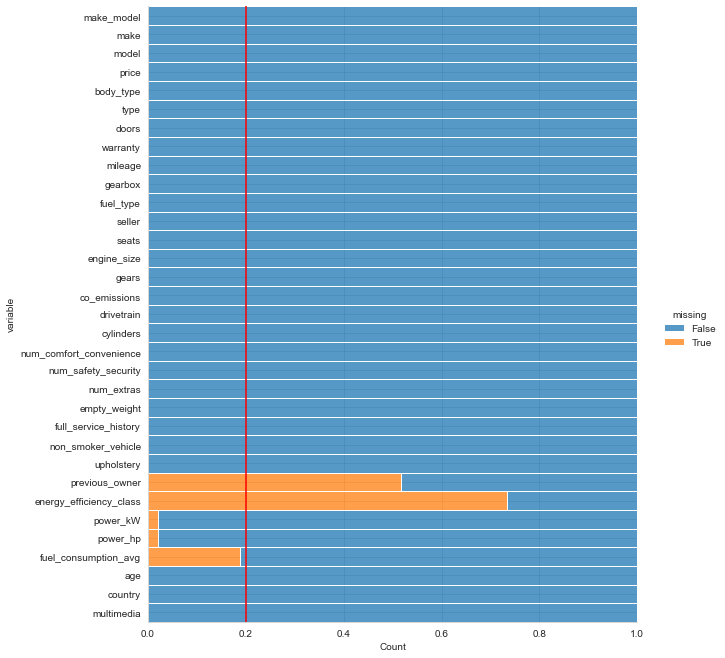

In [253]:
show_nulls(df)

# FILL previous_owner

In [254]:
first_looking("previous_owner")

COLUMN NAME    :  previous_owner
--------------------------------
per_of_nulls   :  % 51.75
num_of_nulls   :  13944
num_of_uniques :  13
--------------------------------
NaN       13944
1.000      9045
2.000      3009
3.000       643
4.000       166
5.000        62
6.000        28
7.000        20
8.000        14
9.000        10
10.000        2
12.000        2
14.000        1
13.000        1
Name: previous_owner, dtype: int64


In [258]:
df.loc[df.age == 0].previous_owner.value_counts(dropna=False)

1.000    1736
NaN      1060
2.000      42
Name: previous_owner, dtype: int64

In [272]:
df.loc[df['previous_owner'].isna() & df['age'].eq(0), 'previous_owner'] = 0

In [273]:
df.previous_owner.isna().sum()

12884

In [278]:
fill_prop(df, "age", "previous_owner")

COLUMN NAME    :  previous_owner
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  14
--------------------------------
0.000      1061
1.000     16649
2.000      6774
3.000      1606
4.000       466
5.000       192
6.000        80
7.000        54
8.000        41
9.000        16
10.000        2
12.000        4
13.000        1
14.000        1
Name: previous_owner, dtype: int64


<Figure size 720x360 with 0 Axes>

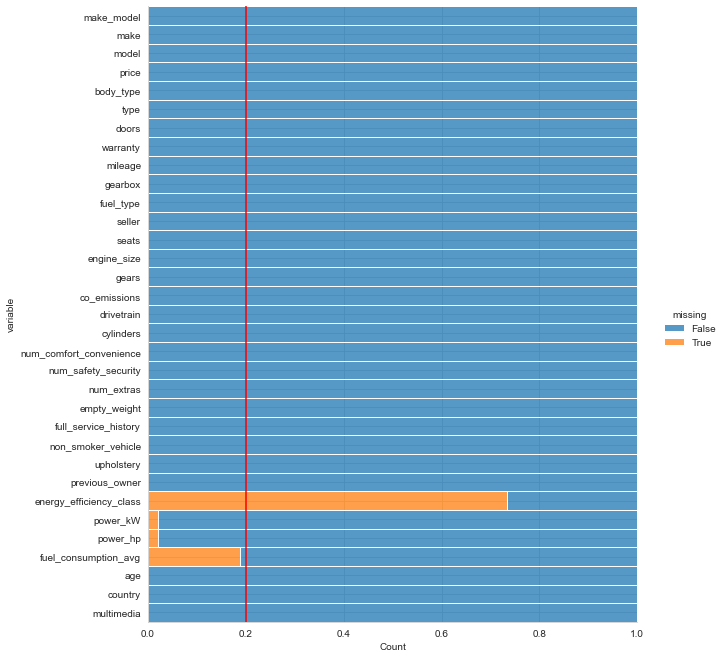

In [280]:
show_nulls(df)

# FILL energy_efficiency_class

In [281]:
first_looking("energy_efficiency_class")

COLUMN NAME    :  energy_efficiency_class
--------------------------------
per_of_nulls   :  % 73.35
num_of_nulls   :  19765
num_of_uniques :  2
--------------------------------
NaN            19765
efficient       4768
unefficient     2414
Name: energy_efficiency_class, dtype: int64


In [282]:
fill(df, "make_model", "age", "energy_efficiency_class", "mode")

COLUMN NAME    :  energy_efficiency_class
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  2
--------------------------------
efficient      17395
unefficient     9550
NaN                2
Name: energy_efficiency_class, dtype: int64


In [290]:
df[df["energy_efficiency_class"].isna() == True]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,engine_size,gears,co_emissions,drivetrain,cylinders,num_comfort_convenience,num_safety_security,num_extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age,country,multimedia
16799,Toyota Corolla,Toyota,Corolla,33999,Compact,Demonstration,5.000,Available,2494.000,Automatic,Benzine,Dealer,5.000,1987.000,1.000,89.000,Front,4.000,15.000,19.000,4.000,1315.000,Yes,No,Cloth,1.000,NaN,135.000,184.000,NaN,NaN,Netherlands,Yes


In [293]:
df[df["energy_efficiency_class"] == "efficient"].co_emissions.sample(20)

22762   122.000
18194     0.000
7011    103.000
14326   123.000
15136     0.000
8579    111.000
655     220.000
13886   109.000
3811    113.000
26246   129.000
8708    103.000
15259    96.000
12466   131.000
5719    124.000
18187   105.000
8706    118.000
1766    137.000
26018   127.000
14905   105.000
7746    191.000
Name: co_emissions, dtype: float64

In [295]:
# I looked at the co_emission values of efficient cars and index 16799 can be a potential candidate for this category

df[df["energy_efficiency_class"].isna() == True].replace({np.nan:"efficient"}, inplace=True)

In [296]:
df["energy_efficiency_class"].value_counts()

efficient      17395
unefficient     9551
Name: energy_efficiency_class, dtype: int64

# FILL power_kW

In [297]:
first_looking("power_kW")

COLUMN NAME    :  power_kW
--------------------------------
per_of_nulls   :  % 2.07
num_of_nulls   :  558
num_of_uniques :  351
--------------------------------
110.000    1806
96.000     1368
66.000     1115
81.000     1103
88.000     1054
85.000     1002
103.000     995
74.000      866
51.000      691
70.000      689
100.000     635
140.000     593
NaN         558
55.000      516
92.000      463
147.000     434
125.000     378
120.000     332
80.000      326
132.000     301
135.000     296
90.000      286
118.000     247
115.000     241
130.000     237
221.000     235
77.000      233
150.000     232
206.000     223
67.000      209
82.000      201
63.000      200
97.000      184
84.000      177
53.000      168
104.000     163
145.000     156
59.000      148
173.000     148
73.000      142
60.000      135
143.000     133
44.000      132
121.000     129
202.000     125
75.000      124
165.000     122
54.000      121
180.000     120
68.000      118
331.000     117
190.000     117
241.00

In [300]:
fill(df, "make_model", "body_type", "power_kW", "mode")

COLUMN NAME    :  power_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  351
--------------------------------
1.000         5
3.000         1
4.000         5
6.000         1
7.000         2
8.000         3
9.000         2
10.000        1
12.000        2
13.000       10
14.000        2
15.000        1
16.000        1
17.000        5
18.000        7
19.000        2
20.000        1
21.000        2
22.000        1
23.000        2
24.000        1
25.000        4
26.000        1
27.000        1
29.000        3
30.000        1
31.000        2
32.000        5
33.000       39
34.000        2
35.000        9
36.000        3
37.000        6
38.000        3
39.000        1
40.000       22
41.000        1
42.000        1
43.000       53
44.000      134
45.000        4
46.000        3
47.000       12
48.000       33
49.000       87
50.000      103
51.000      697
52.000      106
53.000      176
54.000      121
55.000      524
56.000       17
57.000   

# FILL power_hp

In [298]:
first_looking("power_hp")

COLUMN NAME    :  power_hp
--------------------------------
per_of_nulls   :  % 2.07
num_of_nulls   :  558
num_of_uniques :  347
--------------------------------
150.000    1806
131.000    1368
90.000     1115
110.000    1103
120.000    1054
116.000    1002
140.000     995
101.000     866
69.000      691
95.000      689
136.000     635
190.000     593
NaN         558
75.000      516
125.000     463
200.000     434
170.000     378
163.000     332
109.000     326
179.000     301
184.000     296
122.000     286
160.000     247
156.000     241
177.000     237
300.000     235
105.000     233
204.000     232
280.000     223
91.000      209
111.000     201
86.000      200
132.000     184
114.000     177
72.000      168
141.000     163
197.000     156
80.000      148
235.000     148
99.000      142
82.000      135
194.000     133
60.000      132
165.000     129
275.000     125
102.000     124
224.000     122
73.000      121
245.000     120
92.000      118
328.000     117
450.000     117
258.00

In [301]:
fill(df, "make_model", "body_type", "power_hp", "mode")

COLUMN NAME    :  power_hp
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  347
--------------------------------
1.000         9
4.000         1
5.000         5
8.000         1
10.000        2
11.000        3
12.000        2
14.000        1
16.000        2
18.000       10
19.000        2
20.000        1
22.000        1
23.000        5
24.000        7
26.000        2
27.000        1
29.000        2
30.000        1
31.000        2
33.000        1
34.000        4
35.000        1
37.000        1
39.000        3
41.000        1
42.000        2
44.000        5
45.000       39
46.000        2
48.000        9
49.000        3
50.000        6
52.000        3
53.000        1
54.000       22
56.000        1
57.000        1
58.000       53
60.000      134
61.000        4
63.000        3
64.000       12
65.000       33
67.000       87
68.000      103
69.000      697
71.000      106
72.000      176
73.000      121
75.000      524
76.000       17
77.000   

# FILL fuel_consumption_avg

In [299]:
first_looking("fuel_consumption_avg")

COLUMN NAME    :  fuel_consumption_avg
--------------------------------
per_of_nulls   :  % 18.84
num_of_nulls   :  5078
num_of_uniques :  164
--------------------------------
NaN       5078
5.000      796
4.900      781
4.500      644
5.100      624
0.000      608
4.700      600
4.800      576
5.400      570
5.200      534
4.600      534
5.300      534
4.200      532
4.300      531
4.100      521
5.600      494
5.500      486
4.000      478
3.800      474
5.900      467
5.700      462
4.400      444
6.400      427
6.300      402
6.000      387
5.800      369
3.700      360
3.900      335
3.600      314
7.000      290
6.500      281
6.900      266
6.100      261
6.600      258
6.200      254
6.700      252
7.100      250
7.400      240
6.800      221
8.000      192
7.200      191
7.300      190
3.400      186
8.400      185
7.600      170
8.200      164
3.500      160
7.800      160
7.700      152
7.500      152
12.000     111
3.300      104
9.200      102
12.500     100
8.600       94

In [306]:
df[df["fuel_type"] == "Electric"][["fuel_consumption_avg"]].sample(30)

,fuel_consumption_avg
2581,NaN
6857,NaN
23230,3.400
17673,5.300
22032,NaN
5107,NaN
15169,NaN
20431,NaN
9886,4.200
10139,NaN


In [309]:
fill_median(df, "make_model", "body_type", "fuel_type", "fuel_consumption_avg")

column name    :  fuel_consumption_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  222
--------------------------------
5.300     1251
4.900      978
5.000      977
5.100      816
4.500      787
4.700      701
4.800      679
0.000      674
5.400      648
4.600      633
5.200      621
4.200      617
4.100      609
4.300      604
5.700      560
3.800      549
4.400      536
5.600      531
5.900      531
4.000      521
5.500      520
6.000      480
6.300      462
3.900      443
6.400      443
3.700      441
5.800      398
3.600      351
6.500      332
6.900      327
6.100      322
7.000      314
6.200      309
7.400      297
6.600      291
6.700      266
7.100      263
12.000     254
6.800      253
8.400      218
7.300      217
8.000      211
7.700      208
3.400      206
7.500      198
7.600      197
12.100     195
7.200      192
3.500      188
8.200      168
7.800      168
3.300      128
8.300      118
9.800      117
9.200      114
12.5

In [310]:
df[df["fuel_type"] == "Electric"][["fuel_consumption_avg"]].sample(30)

,fuel_consumption_avg
5204,5.300
16765,4.300
2229,6.800
22125,4.300
9189,1.500
22204,5.000
26812,1.700
9109,5.300
23240,3.900
6970,5.300


In [327]:
df.fuel_consumption_avg.replace({0:np.nan}, inplace=True)

In [328]:
first_looking("fuel_consumption_avg")

COLUMN NAME    :  fuel_consumption_avg
--------------------------------
per_of_nulls   :  % 2.5
num_of_nulls   :  674
num_of_uniques :  221
--------------------------------
5.300     1251
4.900      978
5.000      977
5.100      816
4.500      787
4.700      701
4.800      679
NaN        674
5.400      648
4.600      633
5.200      621
4.200      617
4.100      609
4.300      604
5.700      560
3.800      549
4.400      536
5.600      531
5.900      531
4.000      521
5.500      520
6.000      480
6.300      462
3.900      443
6.400      443
3.700      441
5.800      398
3.600      351
6.500      332
6.900      327
6.100      322
7.000      314
6.200      309
7.400      297
6.600      291
6.700      266
7.100      263
12.000     254
6.800      253
8.400      218
7.300      217
8.000      211
7.700      208
3.400      206
7.500      198
7.600      197
12.100     195
7.200      192
3.500      188
8.200      168
7.800      168
3.300      128
8.300      118
9.800      117
9.200      114
12

In [329]:
fill_median(df, "make_model", "body_type", "fuel_type", "fuel_consumption_avg")

column name    :  fuel_consumption_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  224
--------------------------------
5.300     1362
4.900     1021
5.000     1009
5.100      848
4.500      801
4.700      705
4.800      698
5.400      660
5.200      650
4.600      647
4.100      630
4.200      625
4.300      612
5.700      571
3.800      557
4.400      543
5.900      541
5.600      532
4.000      527
5.500      526
6.000      491
6.300      468
3.900      456
3.700      448
6.400      445
5.800      399
3.600      382
6.500      336
6.900      328
6.100      326
7.000      322
6.200      321
7.400      298
6.600      294
7.100      266
6.700      266
12.000     265
6.800      264
7.700      221
7.300      220
8.400      220
8.000      214
3.400      208
7.500      202
7.600      201
12.100     196
7.200      193
3.500      188
8.200      169
7.800      168
3.300      134
9.800      121
8.300      120
9.200      114
12.500     103
8.60

In [330]:
df[df.fuel_consumption_avg == 0]

,make_model,make,model,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,seller,seats,engine_size,gears,co_emissions,drivetrain,cylinders,num_comfort_convenience,num_safety_security,num_extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,power_kW,power_hp,fuel_consumption_avg,age,country,multimedia


<Figure size 720x360 with 0 Axes>

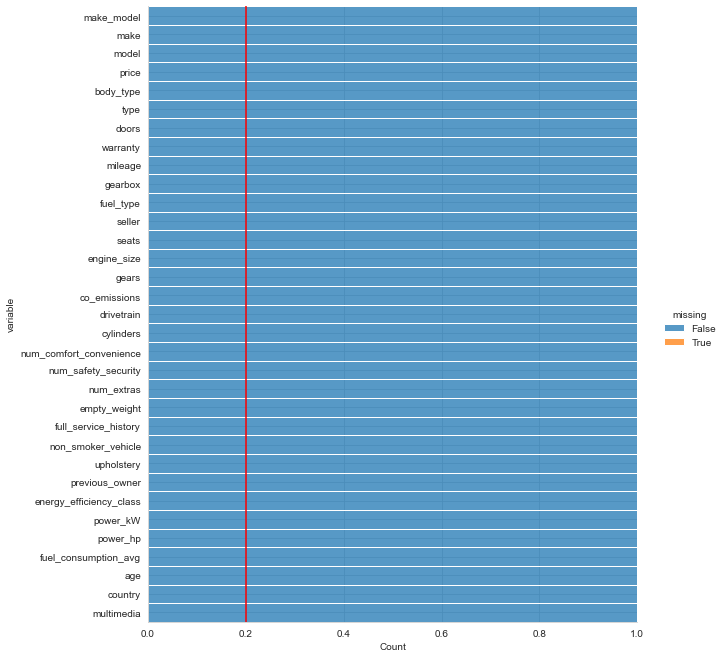

In [332]:
show_nulls(df)

In [333]:
df.shape

(26947, 33)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26947 entries, 0 to 26946
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_model               26947 non-null  object 
 1   make                     26947 non-null  object 
 2   model                    26947 non-null  object 
 3   price                    26947 non-null  int64  
 4   body_type                26947 non-null  object 
 5   type                     26947 non-null  object 
 6   doors                    26947 non-null  float64
 7   warranty                 26947 non-null  object 
 8   mileage                  26947 non-null  float64
 9   gearbox                  26947 non-null  object 
 10  fuel_type                26947 non-null  object 
 11  seller                   26947 non-null  object 
 12  seats                    26947 non-null  float64
 13  engine_size              26947 non-null  float64
 14  gears                 

In [336]:
df.to_csv("Part-2-Data-Imputing-Completed")

# <mark>Data Imputing Completed, next part I'll handle outliers<mark>